<a href="https://colab.research.google.com/github/datacentertugaskuliah-coder/PraktikumDS/blob/main/Analisis_Sosioekonomi_dan_Prediksi_Keputusan_Investasi_Nasabah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== METADATA UCI DATASET BANK MARKETING ===
{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'titl

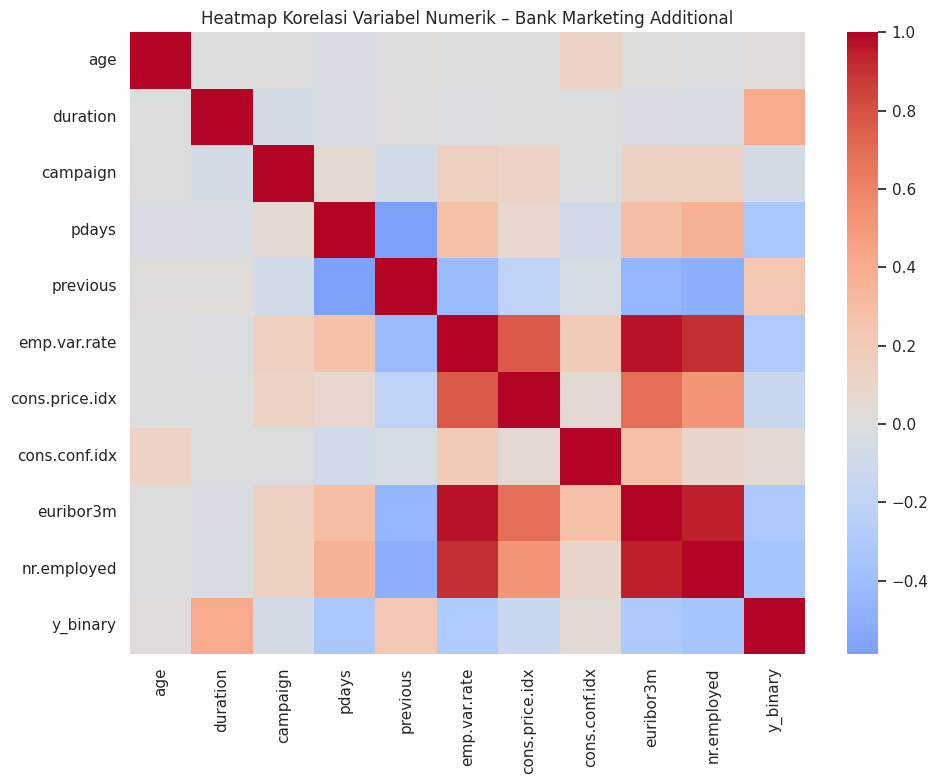

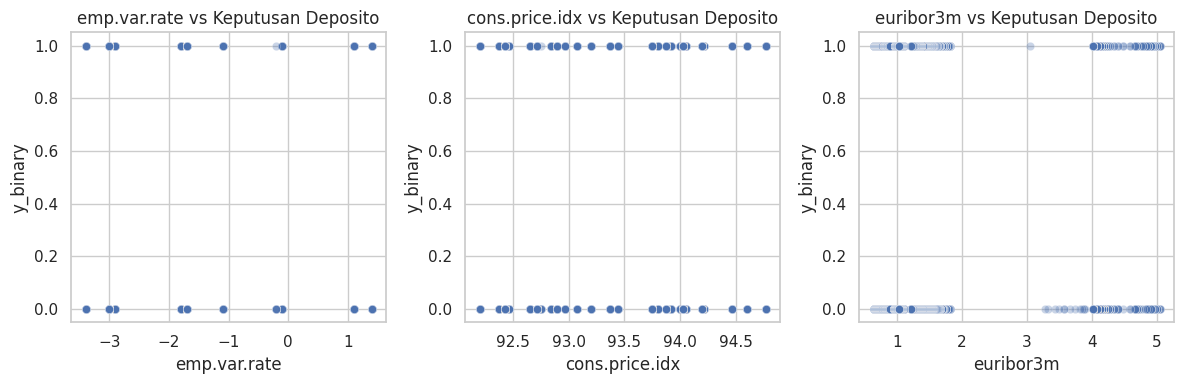

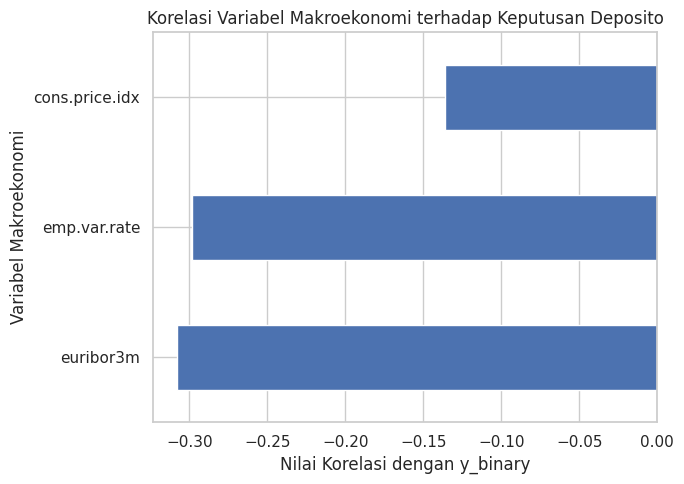

Fitur numerik  : ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
Fitur kategorik: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'] 

Ukuran data latih: (32950, 20)
Ukuran data uji  : (8238, 20) 

=== LAPORAN KLASIFIKASI KEPUTUSAN DEPOSITO ===
              precision    recall  f1-score   support

           0      0.932     0.978     0.954      7310
           1      0.712     0.436     0.541       928

    accuracy                          0.917      8238
   macro avg      0.822     0.707     0.748      8238
weighted avg      0.907     0.917     0.908      8238

Nilai ROC AUC: 0.9424372906740885 



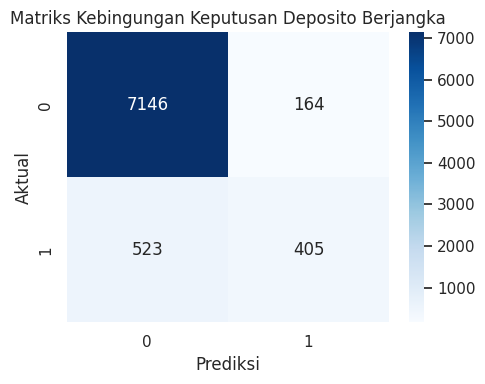

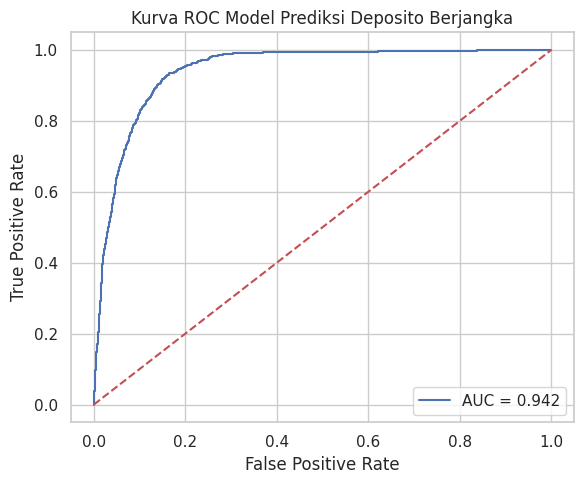

Lima fitur dengan koefisien terbesar (peluang deposito meningkat):
month_aug         0.509778
euribor3m         0.610467
cons.price.idx    1.177989
duration          1.199467
month_mar         1.640903
dtype: float64 

Lima fitur dengan koefisien terkecil (peluang deposito menurun):
emp.var.rate        -2.600061
month_jun           -0.766028
month_may           -0.754961
month_nov           -0.719316
contact_telephone   -0.657522
dtype: float64 



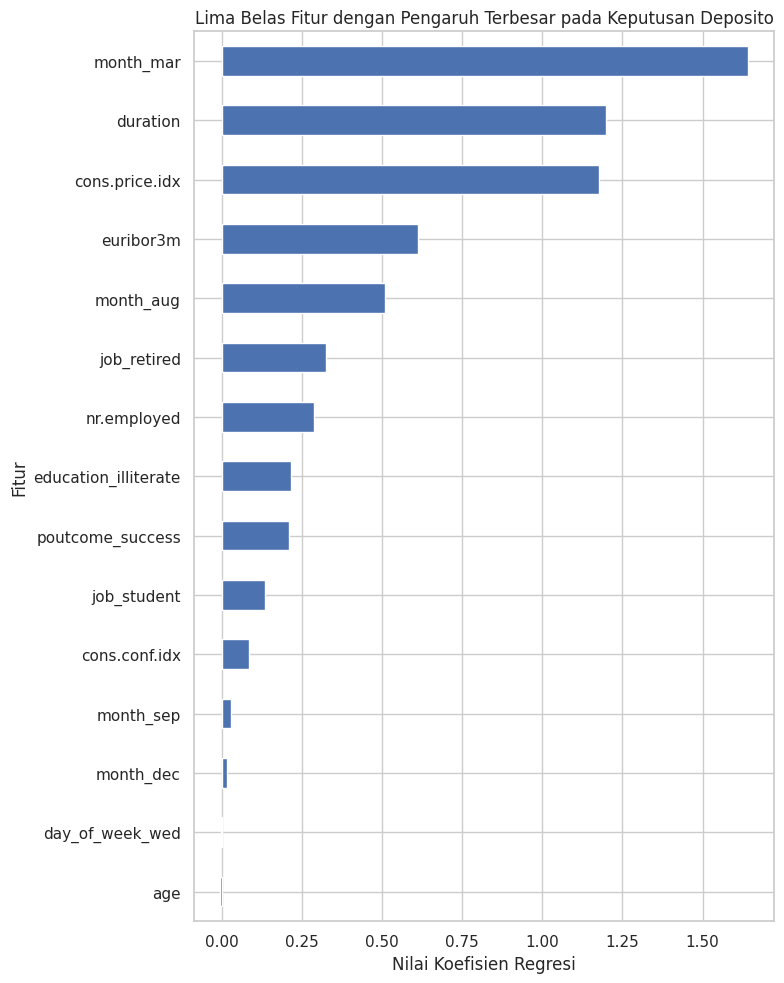

In [3]:
# ==========================================================
# Judul Program : Analisis Sosioekonomi dan Prediksi Keputusan Investasi Nasabah
# Praktikum Data Science dan Machine Learning Berbasis Python dan UCI Repository
# Proyek : Pengaruh variabel makroekonomi terhadap deposito berjangka
# Dataset : Bank Marketing – UCI Machine Learning Repository (ID: 222)
# URL UCI : https://archive.ics.uci.edu/dataset/222/bank+marketing
# Repo   : https://github.com/datacentertugaskuliah-coder/PraktikumDS.git
# Lingkungan : Google Colab
# ==========================================================

# Instalasi pustaka ucimlrepo
!pip install ucimlrepo -q

import pandas as pd
import numpy as np

from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", font_scale=1.0)

# ==========================================================
# TAHAP 1 – Metadata dan informasi variabel dari UCI (ucimlrepo)
# ==========================================================

bank_marketing = fetch_ucirepo(id=222)

print("=== METADATA UCI DATASET BANK MARKETING ===")
print(bank_marketing.metadata, "\n")

print("=== CONTOH TABEL INFORMASI VARIABEL ===")
print(bank_marketing.variables.head(), "\n")  # hanya beberapa baris agar tidak terlalu panjang

# ==========================================================
# TAHAP 2 – Memuat dataset dengan variabel makroekonomi (bank-additional-full)
# ==========================================================

url_zip = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip"
!wget -q {url_zip} -O bank-additional.zip
!unzip -oq bank-additional.zip

df = pd.read_csv("bank-additional/bank-additional-full.csv", sep=";")

print("Kolom data:", df.columns.tolist(), "\n")
print("Ukuran data (baris, kolom):", df.shape, "\n")

print("Distribusi kelas target (y):")
print(df["y"].value_counts(), "\n")

# Tambah label biner untuk klasifikasi
df["y_binary"] = df["y"].map({"no": 0, "yes": 1})

# ==========================================================
# TAHAP 3 – Analisis variabel makroekonomi dan korelasi
# ==========================================================

macro_vars = ["emp.var.rate", "cons.price.idx", "euribor3m"]

# Statistik deskriptif variabel makroekonomi
macro_stats = df[macro_vars].describe().T
print("=== TABEL STATISTIK DESKRIPTIF VARIABEL MAKROEKONOMI ===")
print(macro_stats, "\n")

# Kolom numerik yang valid
numeric_cols = df.select_dtypes(include=["number"]).columns.tolist()

# Matriks korelasi numerik
corr_matrix = df[numeric_cols].corr()

# Korelasi tiap variabel numerik dengan y_binary (jadi Series, aman untuk sort_values)
if "y_binary" in corr_matrix.columns:
    corr_with_target = corr_matrix["y_binary"].sort_values(ascending=False)
    print("=== KORELASI VARIABEL NUMERIK DENGAN KEPUTUSAN DEPOSITO (y_binary) ===")
    print(corr_with_target, "\n")
else:
    print("Kolom y_binary belum tersedia di matriks korelasi.\n")

# Gambar 1 – Heatmap korelasi numerik
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0)
plt.title("Heatmap Korelasi Variabel Numerik – Bank Marketing Additional")
plt.tight_layout()
plt.show()

# Gambar 2 – Scatter plot variabel makroekonomi vs keputusan deposito
plt.figure(figsize=(12, 4))
for i, var in enumerate(macro_vars):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(x=df[var], y=df["y_binary"], alpha=0.3)
    plt.title(f"{var} vs Keputusan Deposito")
    plt.xlabel(var)
    plt.ylabel("y_binary")
plt.tight_layout()
plt.show()

# Gambar 3 – Diagram batang korelasi makroekonomi vs y_binary
plt.figure(figsize=(7, 5))
corr_macro = corr_with_target.loc[[v for v in macro_vars if v in corr_with_target.index]]
corr_macro.sort_values().plot(kind="barh")
plt.title("Korelasi Variabel Makroekonomi terhadap Keputusan Deposito")
plt.xlabel("Nilai Korelasi dengan y_binary")
plt.ylabel("Variabel Makroekonomi")
plt.tight_layout()
plt.show()

# ==========================================================
# TAHAP 4 – Menyiapkan fitur dan target untuk pemodelan prediktif
# ==========================================================

X_model = df.drop(columns=["y", "y_binary"])
y = df["y_binary"]

numeric_features = X_model.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X_model.select_dtypes(include=["object"]).columns

print("Fitur numerik  :", list(numeric_features))
print("Fitur kategorik:", list(categorical_features), "\n")

# Pipeline pra-pemrosesan
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# ==========================================================
# TAHAP 5 – Pembagian data latih dan uji
# ==========================================================

X_train, X_test, y_train, y_test = train_test_split(
    X_model, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Ukuran data latih:", X_train.shape)
print("Ukuran data uji  :", X_test.shape, "\n")

# ==========================================================
# TAHAP 6 – Membangun dan melatih model (Regresi Logistik)
# ==========================================================

clf = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", LogisticRegression(max_iter=1000, n_jobs=-1))
])

clf.fit(X_train, y_train)

# ==========================================================
# TAHAP 7 – Evaluasi model dan visualisasi
# ==========================================================

y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

print("=== LAPORAN KLASIFIKASI KEPUTUSAN DEPOSITO ===")
print(classification_report(y_test, y_pred, digits=3))

cm = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
print("Nilai ROC AUC:", roc_auc, "\n")

# Gambar 4 – Matriks kebingungan
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Matriks Kebingungan Keputusan Deposito Berjangka")
plt.tight_layout()
plt.show()

# Gambar 5 – Kurva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], "r--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Kurva ROC Model Prediksi Deposito Berjangka")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# ==========================================================
# TAHAP 8 – Analisis koefisien fitur (pengaruh variabel)
# ==========================================================

model_lr = clf.named_steps["model"]
ohe = clf.named_steps["preprocess"].named_transformers_["cat"].named_steps["onehot"]
feature_names_cat = ohe.get_feature_names_out(categorical_features)
feature_names_num = numeric_features
all_feature_names = np.concatenate([feature_names_num, feature_names_cat])

coefs = pd.Series(model_lr.coef_[0], index=all_feature_names).sort_values()

print("Lima fitur dengan koefisien terbesar (peluang deposito meningkat):")
print(coefs.tail(5), "\n")

print("Lima fitur dengan koefisien terkecil (peluang deposito menurun):")
print(coefs.head(5), "\n")

# Gambar 6 – Diagram batang fitur paling berpengaruh
plt.figure(figsize=(8, 10))
coefs.tail(15).plot(kind="barh")
plt.title("Lima Belas Fitur dengan Pengaruh Terbesar pada Keputusan Deposito")
plt.xlabel("Nilai Koefisien Regresi")
plt.ylabel("Fitur")
plt.tight_layout()
plt.show()
